In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pingparsing
import seaborn as sns

In [2]:
def extract_pings(filename):
    parser = pingparsing.PingParsing()
    with open(filename, 'r') as f:
        raw = f.read()
        stats = parser.parse(raw)
    ts = []
    for icmp in stats.icmp_replies:
        t = icmp['time']
        ts.append(t)
    return ts

def clean_extremes(xs, inf=5, sup=95):
    inf = np.percentile(xs, inf)
    sup = np.percentile(xs, sup)
    xs_ = [x for x in xs if x > inf and x < sup]
    return xs_

In [3]:
data = {}
data['iperf'] = {}
data['iperf']['stress'] = []
data['iperf']['nostress'] = []
data['noiperf'] = {}
data['noiperf']['stress'] = []
data['noiperf']['nostress'] = []
labels = {}
labels['iperf'] = {}
labels['iperf']['stress'] = 'Network traffic and high CPU load'
labels['iperf']['nostress'] = 'Network traffic and low CPU load'
labels['noiperf'] = {}
labels['noiperf']['stress'] = 'No network traffic and high CPU load'
labels['noiperf']['nostress'] = 'No network traffic and low CPU load'

for iperf in ['iperf', 'noiperf']:
    for stress in ['stress', 'nostress']:
        for i in range(2, 11):
            filename = '%s/%s_nostress_%i.ping' % (stress, iperf, i)
            ts = clean_extremes(extract_pings(filename))
            mu, sig = np.mean(ts), np.std(ts)
            data[iperf][stress].append((mu, sig))

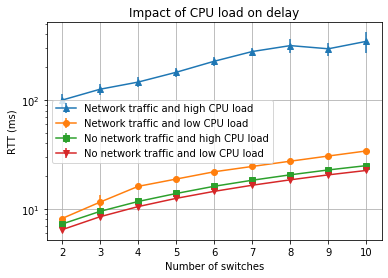

In [4]:
markers = ['^', 'o', 's', 'v']

xs = list(range(2, 11))

j = 0
for iperf in ['iperf', 'noiperf']:
    for stress in ['stress', 'nostress']:
        ys = []
        yerrs = []
        for i in range(9):
            mu, sig = data[iperf][stress][i]
            ys.append(mu)
            yerrs.append(sig)
        # plt.plot(xs, ys, marker=markers[j], label=labels[iperf][stress])
        plt.errorbar(xs, ys, yerr=yerrs, marker=markers[j], label=labels[iperf][stress])
        j += 1
plt.xlabel('Number of switches'); plt.ylabel('RTT (ms)')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.title('Impact of CPU load on delay')
plt.savefig('bigcpuimpact.png')